In [0]:
#Done by SANJAY MALLASAMUDRAM SANTHANAM ; USC ID:3124715393
#PART (a)
import pandas as pd
import numpy as np
import math
import copy
import os

In [0]:
#load data
data=np.loadtxt('linsep.txt',delimiter=",")

In [3]:
len(data)

100

In [0]:
#separate input and label
x=data[:,0:2]
y=data[:,2]

In [0]:
#find number of data points and dimensions of point
N=len(x)
d=len(x[0])
y=y.reshape((N,1))

In [0]:
import cvxopt
from cvxopt import matrix,solvers

In [0]:
#Pij=(yi*yj*Xi.T*Xj)
P=matrix(np.matmul(y*x,(y*x).T), tc='d')
#q=(-1)T i.e. vector of -1
q=matrix(-1*np.ones((N,1)), tc='d')
#G is identity matrix with diagonal =-1 as we have alpha>0 <=> -alpha<0 
G=matrix(-1*np.eye(N), tc='d')
#h is vector of zeros as we have RHS OF - alpha<0 as zero
h=matrix(np.zeros(N), tc='d')
#A= y as we have constraint y.T*alpha=0
A=matrix(y.reshape(-1,N),tc='d')
#b=0 as we have the RHS to be zero. 
b=matrix(np.zeros(1), tc='d')



In [8]:
#solve eqn 
sol = solvers.qp(P,q,G,h,A,b)


     pcost       dcost       gap    pres   dres
 0: -2.0636e+01 -4.3905e+01  3e+02  2e+01  2e+00
 1: -2.2372e+01 -3.7202e+01  9e+01  5e+00  5e-01
 2: -2.3112e+01 -3.8857e+01  5e+01  2e+00  2e-01
 3: -2.8318e+01 -3.3963e+01  1e+01  4e-01  4e-02
 4: -3.2264e+01 -3.3927e+01  2e+00  1e-02  1e-03
 5: -3.3568e+01 -3.3764e+01  2e-01  1e-03  1e-04
 6: -3.3737e+01 -3.3739e+01  2e-03  1e-05  1e-06
 7: -3.3739e+01 -3.3739e+01  2e-05  1e-07  1e-08
 8: -3.3739e+01 -3.3739e+01  2e-07  1e-09  1e-10
Optimal solution found.


In [9]:
#print all alpha values
print((sol['x']))

[ 1.16e-09]
[ 2.96e-09]
[ 4.32e-09]
[ 6.23e-10]
[ 3.97e-10]
[ 3.31e-09]
[ 9.20e-10]
[ 2.30e-09]
[ 4.69e-10]
[ 9.07e-10]
[ 3.00e-09]
[ 7.27e-10]
[ 3.94e-10]
[ 6.73e-10]
[ 1.36e-09]
[ 6.96e-10]
[ 8.36e-10]
[ 2.23e-09]
[ 2.00e-09]
[ 1.64e-09]
[ 1.03e-09]
[ 1.14e-09]
[ 1.74e-08]
[ 2.90e-09]
[ 1.51e-09]
[ 2.15e-07]
[ 2.39e-09]
[ 3.37e+01]
[ 2.83e-09]
[ 2.39e-09]
[ 4.21e-10]
[ 9.74e-10]
[ 5.47e-10]
[ 1.16e-09]
[ 3.79e-10]
[ 1.66e-09]
[ 1.58e-09]
[ 8.94e-10]
[ 5.28e-10]
[ 2.00e-09]
[ 8.22e-10]
[ 5.63e-10]
[ 3.24e-09]
[ 9.98e-10]
[ 9.14e-10]
[ 4.02e-10]
[ 4.12e-10]
[ 1.76e-09]
[ 2.15e-09]
[ 1.30e-09]
[ 1.31e-09]
[ 1.16e-09]
[ 1.92e-09]
[ 1.41e-09]
[ 7.22e-10]
[ 9.69e-09]
[ 2.97e-08]
[ 4.06e-09]
[ 7.65e-10]
[ 9.54e-10]
[ 6.23e-09]
[ 3.74e-09]
[ 5.52e-10]
[ 1.20e-09]
[ 1.12e-09]
[ 1.82e-09]
[ 1.29e-09]
[ 1.09e-09]
[ 3.32e-10]
[ 1.52e-09]
[ 4.68e-10]
[ 2.07e-09]
[ 4.95e-10]
[ 2.86e-09]
[ 1.52e-09]
[ 2.76e-09]
[ 2.56e-09]
[ 5.67e-10]
[ 2.74e-09]
[ 1.11e-09]
[ 1.11e-09]
[ 7.11e-10]
[ 1.51e-09]
[ 1.

In [10]:
#solution details
sol

{'dual infeasibility': 1.2144726770965757e-10,
 'dual objective': -33.738752410222155,
 'dual slack': 1.6873103881494114e-10,
 'gap': 2.4222439971708235e-07,
 'iterations': 8,
 'primal infeasibility': 1.163461785745105e-09,
 'primal objective': -33.7387521905106,
 'primal slack': 4.479968201171581e-10,
 'relative gap': 7.179411922211238e-09,
 's': <100x1 matrix, tc='d'>,
 'status': 'optimal',
 'x': <100x1 matrix, tc='d'>,
 'y': <1x1 matrix, tc='d'>,
 'z': <100x1 matrix, tc='d'>}

In [0]:
#Compute w
w=0
for i in range(N):
  w+=sol['x'][i]*y[i]*x[i,:]


In [12]:
print("W:")
print(w)

W:
[ 7.2500563  -3.86188924]


In [0]:

sv=(np.array(sol['x'])>0.0001).flatten()
#represents position of support vectors i.e. alphas that are >0
sv_idx=np.argwhere(sv)

In [14]:
sv_idx

array([[27],
       [83],
       [87]])

In [15]:
#non zero alpha values
print(np.array(sol['x'])[sv_idx])

[[[33.73875192]]

 [[ 1.29468506]]

 [[32.4440672 ]]]


In [16]:
print("Support vectors:")

print(x[sv_idx])

Support vectors:
[[[0.24979414 0.18230306]]

 [[0.3917889  0.96675591]]

 [[0.02066458 0.27003158]]]


In [17]:
#compute value of b 
b=y[sv_idx[0]]-np.dot(x[sv_idx[0]],w)
print("b:")
print(b)

b:
[[-0.10698734]]


In [18]:
y_pred=np.zeros(N)
for i in range(N):
  y_pred[i]=np.sign(np.dot(w,x[i])+b)
err=0
for i in range(N):
  if(y_pred[i]!=y[i]):
    err=err+1
print("Accuracy of implementation:",(N-err)/N)


Accuracy of implementation: 1.0


In [19]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(x,y)
print("Support vectors of library functon:")
print(clf.support_vectors_)
print("Coefficients:")
print(clf.coef_)
print("Intercept:")
print(clf.intercept_)
y_pred=clf.predict(x)
print("Accuracy of library function:")
print(clf.score(x,y_pred))

Support vectors of library functon:
[[0.23307747 0.86884518]
 [0.23918196 0.81585285]
 [0.14301642 0.85313079]
 [0.14586533 0.74931925]
 [0.26419794 0.91067489]
 [0.06756031 0.65812372]
 [0.17422964 0.6157447 ]
 [0.01107579 0.39873158]
 [0.15267995 0.8006936 ]
 [0.03436631 0.50247843]
 [0.3917889  0.96675591]
 [0.02066458 0.27003158]
 [0.55919837 0.70372314]
 [0.2498981  0.15693917]
 [0.65628367 0.77812372]
 [0.27872572 0.23552777]
 [0.24979414 0.18230306]
 [0.70631503 0.87261758]
 [0.22068726 0.11139981]
 [0.36354491 0.25915653]
 [0.42066002 0.43762265]
 [0.76570056 0.98727513]
 [0.45552411 0.49956489]
 [0.6798148  0.90468041]]
Coefficients:
[[ 3.59965788 -2.03198838]]
Intercept:
[0.21848298]
Accuracy of library function:
1.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#part 2 nonlinear data
data=np.loadtxt('nonlinsep.txt',delimiter=",")

In [0]:
x=data[:,0:2]
y=data[:,2]

In [0]:
#find positive and negative class for plotting
pos_x=[]
neg_x=[]
for i in range(len(x)):
  if(y[i]>0):
    pos_x.append(list(x[i]))
  else:
    neg_x.append(list(x[i]))

In [0]:
pos_x=np.array(pos_x)
neg_x=np.array(neg_x)

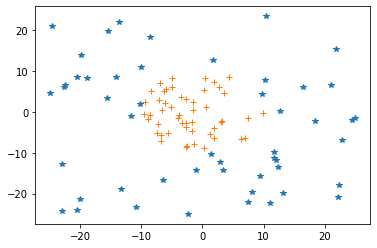

In [24]:
#plot graph
import matplotlib.pyplot as plt
plt.plot(pos_x[:,0],pos_x[:,1],'*')
plt.plot(neg_x[:,0],neg_x[:,1],'+')

In [0]:
N=len(x)
d=len(x[0])
y=y.reshape((N,1))

In [26]:
import numpy.linalg as la
from numpy import linalg
print("*****************************************************************************************************")
print("*****************************************************************************************************")
print("*****************************************************************************************************")
print("\n\n\n")
print("Kernel used is polynomial kernel \nFrom the above plot it is clear the equation of curve is a circle")
print("\n\n\n")
print("*****************************************************************************************************")
print("*****************************************************************************************************")
print("*****************************************************************************************************")


def kernel(x, y, p=2):
    return (1 + np.dot(x, y)) ** p


*****************************************************************************************************
*****************************************************************************************************
*****************************************************************************************************




Kernel used is polynomial kernel 
From the above plot it is clear the equation of curve is a circle




*****************************************************************************************************
*****************************************************************************************************
*****************************************************************************************************


In [0]:
#Calculate Pij=(yi*yj*Kernel(Xi,Xj))
P=np.zeros((N,N))
for i in range(N):
  for j in range(N):
    P[i][j]=y[i]*y[j]*kernel(x[i],x[j])


In [0]:
P=matrix(P, tc='d')


#q=(-1)T i.e. vector of -1
q=matrix(-1*np.ones((N,1)), tc='d')
#G is identity matrix with diagonal =-1 as we have alpha>0 <=> -alpha<0 
G=matrix(-1*np.eye(N), tc='d')
#h is vector of zeros as we have RHS OF - alpha<0 as zero
h=matrix(np.zeros(N), tc='d')
#A= y as we have constraint y.T*alpha=0
A=matrix(y.reshape(-1,N),tc='d')
#b=0 as we have the RHS to be zero. 
b=matrix(np.zeros(1), tc='d')



In [29]:
sol = solvers.qp(P,q,G,h,A,b)
#solve for equation

     pcost       dcost       gap    pres   dres
 0: -4.0666e+01 -1.0206e+02  5e+02  2e+01  3e+00
 1: -1.5924e+02 -2.2789e+02  3e+02  1e+01  1e+00
 2: -2.9280e+02 -3.6244e+02  3e+02  1e+01  1e+00
 3: -5.7710e+02 -6.0303e+02  4e+02  9e+00  1e+00
 4: -1.2873e+03 -1.2409e+03  5e+02  9e+00  1e+00
 5: -1.2647e+03 -1.0924e+03  7e+02  8e+00  9e-01
 6: -6.9076e+02 -4.0802e+02  1e+03  5e+00  6e-01
 7: -1.8688e+02 -2.9779e+01  4e+02  1e+00  2e-01
 8: -3.4731e+00 -5.2038e-02  1e+01  3e-02  4e-03
 9: -3.5053e-02 -3.8447e-02  1e-01  3e-04  3e-05
10: -2.1413e-02 -2.7448e-02  6e-03  1e-17  2e-13
11: -2.6166e-02 -2.6328e-02  2e-04  5e-18  2e-13
12: -2.6293e-02 -2.6295e-02  2e-06  5e-18  1e-13
13: -2.6295e-02 -2.6295e-02  2e-08  4e-18  1e-13
Optimal solution found.


In [30]:
#print all alpha calues
print(sol['x'])

[ 3.14e-12]
[ 8.72e-12]
[ 3.34e-12]
[ 3.56e-12]
[ 1.29e-11]
[ 1.25e-02]
[ 1.55e-11]
[ 6.94e-12]
[ 1.98e-12]
[ 7.51e-12]
[ 1.31e-11]
[ 4.36e-12]
[ 1.81e-12]
[ 2.93e-12]
[ 1.99e-11]
[ 3.66e-12]
[ 3.77e-12]
[ 2.54e-12]
[ 8.59e-12]
[ 2.91e-12]
[ 2.19e-12]
[ 5.27e-12]
[ 7.01e-12]
[ 3.96e-12]
[ 3.03e-12]
[ 1.92e-12]
[ 7.83e-12]
[ 1.01e-11]
[ 5.73e-12]
[ 4.41e-12]
[ 4.45e-12]
[ 3.96e-12]
[ 2.06e-12]
[ 3.02e-12]
[ 6.01e-12]
[ 2.70e-12]
[ 1.50e-02]
[ 3.56e-12]
[ 1.81e-11]
[ 2.36e-12]
[ 3.27e-12]
[ 3.03e-12]
[ 5.93e-12]
[ 3.25e-12]
[ 2.18e-12]
[ 8.37e-12]
[ 3.71e-12]
[ 2.48e-12]
[ 7.29e-12]
[ 2.38e-12]
[ 4.66e-12]
[ 6.64e-03]
[ 4.31e-12]
[ 2.74e-12]
[ 7.33e-12]
[ 4.66e-03]
[ 2.21e-12]
[ 6.45e-12]
[ 8.33e-12]
[ 6.87e-10]
[ 5.51e-12]
[ 8.83e-12]
[ 5.90e-12]
[ 5.62e-12]
[ 6.83e-12]
[ 6.12e-12]
[ 6.15e-12]
[ 8.25e-12]
[ 5.62e-12]
[ 2.04e-11]
[ 7.11e-12]
[ 4.95e-11]
[ 6.86e-12]
[ 8.47e-12]
[ 9.10e-12]
[ 6.36e-12]
[ 8.38e-12]
[ 1.25e-11]
[ 7.32e-12]
[ 6.38e-12]
[ 9.99e-12]
[ 7.81e-12]
[ 5.81e-12]
[ 7.

In [31]:
sol

{'dual infeasibility': 1.4009764698038531e-13,
 'dual objective': -0.02629468169231002,
 'dual slack': 2.7068456092004104e-08,
 'gap': 1.6155817802359547e-08,
 'iterations': 13,
 'primal infeasibility': 4.422694427346993e-18,
 'primal objective': -0.02629466553649222,
 'primal slack': 1.8082528872251508e-12,
 'relative gap': 6.144142727329316e-07,
 's': <100x1 matrix, tc='d'>,
 'status': 'optimal',
 'x': <100x1 matrix, tc='d'>,
 'y': <1x1 matrix, tc='d'>,
 'z': <100x1 matrix, tc='d'>}

In [0]:
#Find non zero alpha positions
sv=(np.array(sol['x'])>0.0001).flatten()
sv_idx=np.argwhere(sv)

In [33]:
sv_idx

array([[ 5],
       [36],
       [51],
       [55],
       [94],
       [95]])

In [0]:
#support vector
sup_vec=x[sv_idx]

In [35]:
len(sup_vec)

6

In [36]:
print("Support vector:")
print(sup_vec)

Support vector:
[[[ -8.47422847   5.15621613]]

 [[-10.260969     2.07391791]]

 [[  1.3393313  -10.29098822]]

 [[  9.67917724   4.3759541 ]]

 [[ -6.80002274  -7.02384335]]

 [[  9.90143538  -0.31483149]]]


In [37]:
sup_vec.flatten().reshape(len(sv_idx),d)

array([[ -8.47422847,   5.15621613],
       [-10.260969  ,   2.07391791],
       [  1.3393313 , -10.29098822],
       [  9.67917724,   4.3759541 ],
       [ -6.80002274,  -7.02384335],
       [  9.90143538,  -0.31483149]])

In [0]:
#non zero alpha values
sup_vec_alpha=np.array(sol['x'])[sv_idx]

In [39]:
sup_vec_alpha

array([[[0.0125012 ]],

       [[0.0149904 ]],

       [[0.00664213]],

       [[0.00466215]],

       [[0.00740837]],

       [[0.00638511]]])

In [0]:
#labels of support vectors
sup_vec_y=y[sv_idx]

In [41]:
sup_vec_y

array([[[-1.]],

       [[ 1.]],

       [[ 1.]],

       [[ 1.]],

       [[-1.]],

       [[-1.]]])

In [0]:
#Calculate b value using a random support vector as m value
b=y[sv_idx[0]]
for i in range(len(sup_vec)):
  b-=sup_vec_alpha[i]*sup_vec_y[i]*kernel(x[sv_idx[i]],x[sv_idx[0]].T)


In [43]:
print("b:")
print(b)

b:
[[-16.66005249]]


In [49]:
y_pred=np.zeros(N)
for i in range(N):
  s=0
  for j in range(len(sv_idx)):
    s+=sup_vec_alpha[j]*sup_vec_y[j]*kernel(x[sv_idx[j]],x[i])
  y_pred[i]=np.sign(s+b)
err=0
for i in range(N):
  if(y_pred[i]!=y[i]):
    err=err+1
print("Accuracy of implementation:",(N-err)/N)

Accuracy of implementation: 1.0


In [51]:
from sklearn.svm import SVC
clf = SVC(kernel='poly')
clf.fit(x,y)
print("Support vectors of library functon:")
print(clf.support_vectors_)

print("Intercept:")
print(clf.intercept_)
y_pred=clf.predict(x)
print("Accuracy of library function:")
print(clf.score(x,y_pred))

Support vectors of library functon:
[[ -8.47422847   5.15621613]
 [  1.31699547  -5.38274816]
 [ -2.7471552   -8.47244873]
 [  2.97968693  -2.49860433]
 [ -2.52922727  -8.29282482]
 [  7.38012912  -1.36077284]
 [ -3.97598846  -1.57588443]
 [ -5.6641213   -5.15957119]
 [ -6.90647562   7.14833849]
 [  0.62777463   1.24416427]
 [ -1.40132717  -7.89496002]
 [  3.25517668  -2.17320191]
 [ -1.56822041   0.54897313]
 [ -2.75451922  -3.66892412]
 [  0.19284408   5.28058385]
 [ -1.73942447  -2.49247814]
 [ -7.47227246  -5.09869845]
 [ -1.62434502   2.54344738]
 [ -6.58460709   0.49263571]
 [ -9.46760885   2.36139525]
 [ -6.11267832   2.260214  ]
 [ -6.01390512   5.64535541]
 [ -5.11486937   1.21194674]
 [ -6.28466148   5.23802834]
 [  6.3666283   -6.49712918]
 [ -6.82939503  -5.58508942]
 [ -2.66451453  -2.5921847 ]
 [  0.20162846  -8.81260121]
 [ -7.22017042  -2.99311063]
 [ -2.70069925   3.22027052]
 [  3.49129216   4.55141497]
 [ -7.07467953   2.99084456]
 [ -3.27127183  -2.69337135]
 [ -3.4

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
